In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path = 'C:/Users/UOS/proj_0/EDA/'

df = pd.read_csv(path + "agoda.csv")
df.head()

,hotel_name,Score,Country,Traveler Type,Room Type,Stay Duration,Title,Text,Date
0,U Hotel Fifth Avenue,10.0,US,Couple,Standard Room,Stayed 1 night in November 2023,UHotel was excellent!!”,"Love my main-man at the front desk, way to go ...","Reviewed November 08, 2023"
1,U Hotel Fifth Avenue,10.0,US,Couple,Contemporary Queen,Stayed 2 nights in December 2022,Best and affordable Hotel ”,Best hotel location nearest to Empire State Bu...,"Reviewed December 26, 2022"
2,U Hotel Fifth Avenue,10.0,US,Couple,Contemporary Queen,Stayed 1 night in September 2023,Perfect for a couple’s weekend getaway!”,I saw some poor reviews on the size of the roo...,"Reviewed September 21, 2023"
3,U Hotel Fifth Avenue,10.0,US,Business traveler,Standard Room,Stayed 1 night in July 2023,Was awesome!!”,Thew check-in was so efficient and painless. R...,"Reviewed July 19, 2023"
4,U Hotel Fifth Avenue,8.0,US,Couple,Standard Room,Stayed 1 night in January 2024,Review”,Review on my recent stay,"Reviewed January 09, 2024"


In [3]:
len(df)

32084

In [4]:
df.isnull().sum()

hotel_name           0
Score                0
Country            865
Traveler Type       31
Room Type        12400
Stay Duration      177
Title                0
Text                27
Date                 0
dtype: int64

In [5]:
df_clean = df.dropna(subset=['Country', 'Score'])

In [6]:
# 국가 종류 확인
countries = df['Country'].unique()
print("국가 종류:", countries)

국가 종류: ['US' 'SG' 'PH' 'ID' 'KR' 'TH' 'MY' 'IN' 'CA' 'GB' 'TW' 'AE' 'PR' 'RU'
 'ES' 'UA' 'LK' 'MX' 'VN' 'AU' nan 'SI' 'IQ' 'HK' 'CN' 'CH' 'DE' 'JP' 'SA'
 'IL' 'SE' 'NO' 'NZ' 'FR' 'BM' 'DK' 'BN' 'LA' 'NL' 'IT' 'PL' 'CZ' 'TR'
 'ZA' 'CL' 'FI' 'CO' 'MO' 'PK' 'LB' 'JM' 'EG' 'GU' 'JO' 'BE' 'BR' 'PE'
 'BH' 'PT' 'KZ' 'RO' 'BD' 'UZ' 'MN' 'KW' 'QA' 'MT' 'IE' 'EE' 'MM' 'AZ'
 'SV' 'VI' 'GR' 'AW' 'KE' 'RS' 'AR' 'BO' 'DZ' 'AT' 'HU' 'EC' 'CR' 'GP'
 'TT' 'DO' 'HR' 'GT' 'TM' 'BS' 'CY' 'SX' 'HT' 'MQ' 'BG' 'NP' 'BW' 'NG'
 'KH' 'UY' 'MU' 'OM' 'PA' 'LU' 'MA' 'MC' 'IS' 'MK' 'GE' 'KY' 'IM' 'VE'
 'RE' 'TF' 'BB' 'CW' 'HN' 'PG' 'GG' 'MV' 'TD' 'SK' 'TZ' 'FJ' 'LT' 'BT'
 'GY' 'ET' 'AD' 'ZW' 'MF' 'AM' 'BA' 'KG' 'AF' 'MZ' 'GD' 'GI' 'TC' 'GN'
 'LY' 'SN' 'GQ' 'BZ' 'PY' 'JE' 'NI' 'PS' 'SZ' 'RW' 'GH' 'AG' 'DM' 'CI'
 'NC' 'UG' 'PF' 'KN' 'SR' 'LV' 'AO' 'VA']


In [7]:
# 국가별 데이터 값의 빈도 계산
country_counts = df['Country'].value_counts()
print("국가별 데이터 값의 빈도:")
print(country_counts)

국가별 데이터 값의 빈도:
Country
US    8840
KR    2681
GB    1578
JP    1414
AU    1381
      ... 
TC       1
GN       1
LY       1
GQ       1
VA       1
Name: count, Length: 162, dtype: int64


In [8]:
# 빈도가 100보다 큰 국가 필터링
country_counts_filtered = country_counts[country_counts > 100]

print("빈도가 100보다 큰 국가별 데이터 값의 빈도:")
print(country_counts_filtered)

빈도가 100보다 큰 국가별 데이터 값의 빈도:
Country
US    8840
KR    2681
GB    1578
JP    1414
AU    1381
CA    1082
SG    1053
CN     919
PH     906
TW     866
ID     821
TH     750
DE     649
FR     631
HK     598
MY     482
IL     442
IT     411
ES     392
SE     342
IN     335
BR     307
CH     272
NL     270
AR     232
VN     230
IE     181
AE     181
MX     180
NO     177
SA     158
ZA     148
DK     144
RU     129
NZ     128
CO     111
PR     110
PK     103
Name: count, dtype: int64


C:\Users\UOS\AppData\Local\Temp\ipykernel_27348\148946410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts_filtered.index, y=country_counts_filtered.values, palette='viridis')


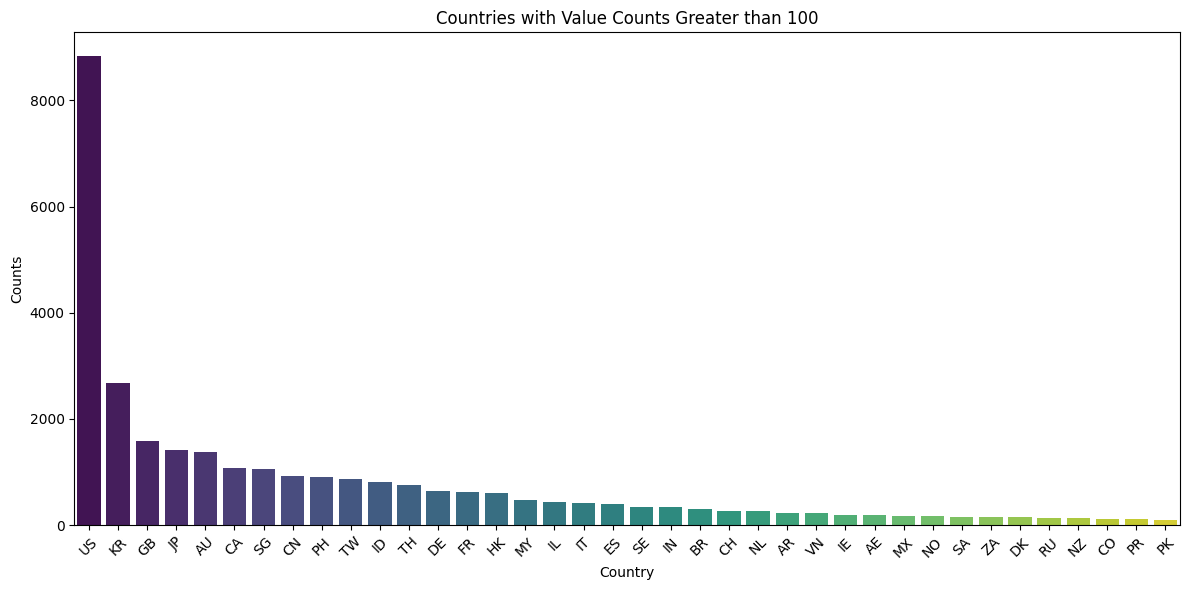

In [9]:
# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts_filtered.index, y=country_counts_filtered.values, palette='viridis')
plt.title('Countries with Value Counts Greater than 100')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

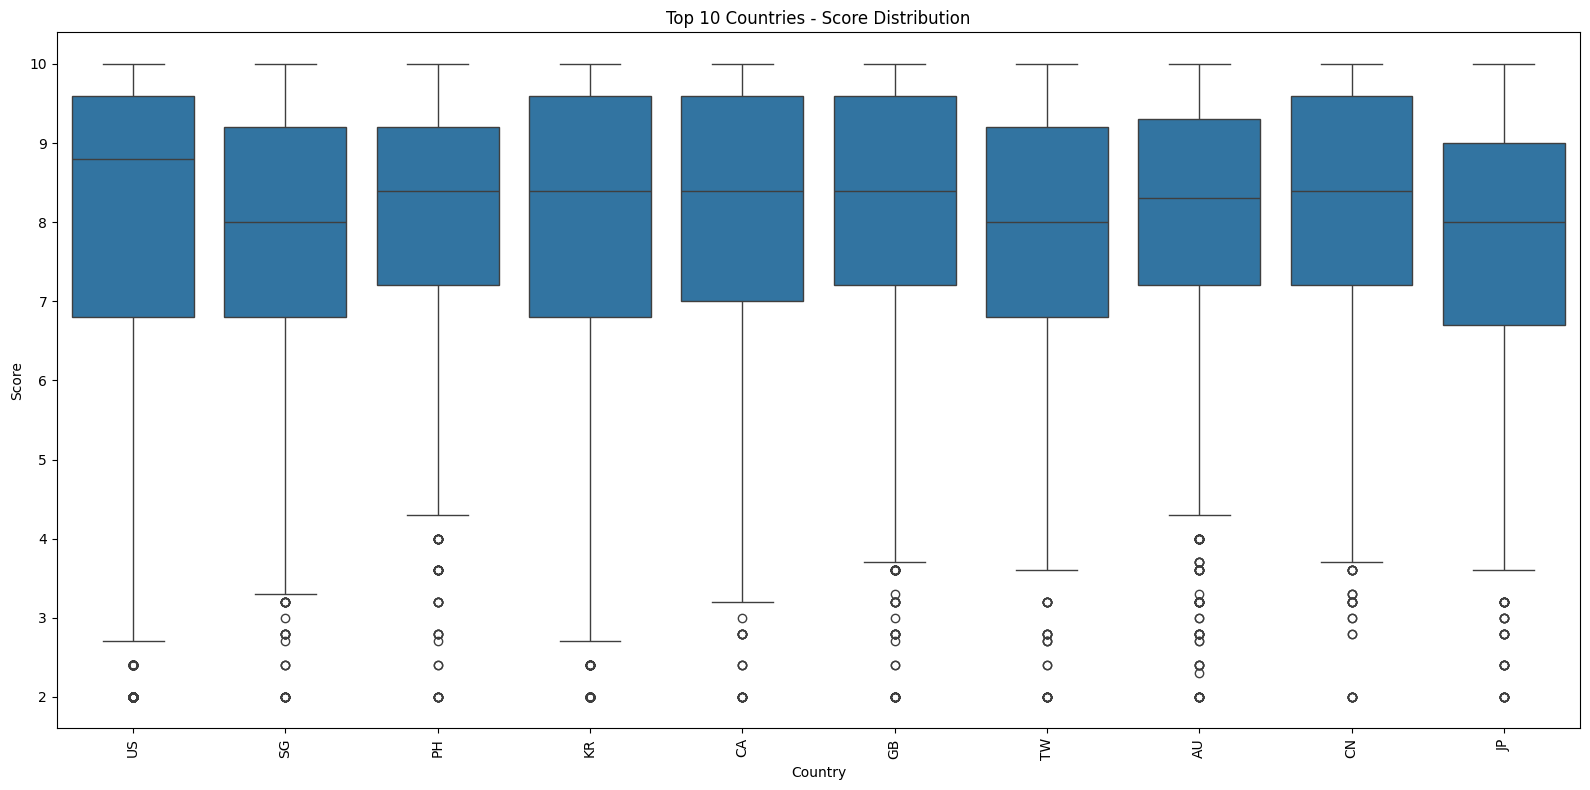

In [10]:
# 상위 10개 국가 추출
top_countries = df_clean['Country'].value_counts().nlargest(10).index
df_top_countries = df_clean[df_clean['Country'].isin(top_countries)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='Country', y='Score', data=df_top_countries)
plt.xticks(rotation=90)  # 국가명이 많으므로 x축 라벨을 회전
plt.title('Top 10 Countries - Score Distribution')
plt.xlabel('Country')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

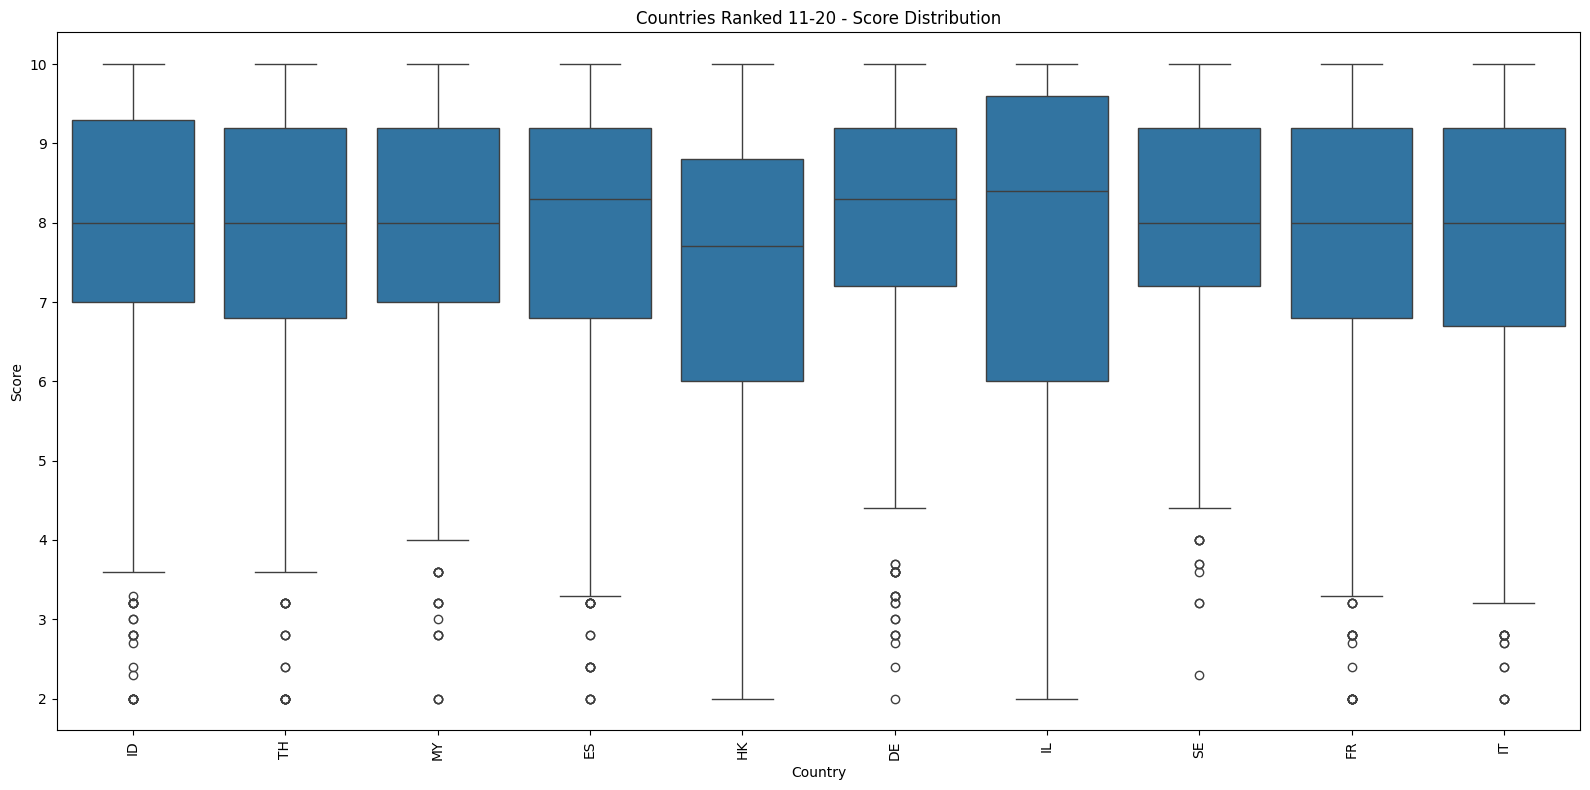

In [11]:
# 상위 11~20위 국가 추출
top_11_20_countries = df_clean['Country'].value_counts().nlargest(20).iloc[10:20].index
df_top_11_20_countries = df_clean[df_clean['Country'].isin(top_11_20_countries)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='Country', y='Score', data=df_top_11_20_countries)
plt.xticks(rotation=90)  # 국가명이 많으므로 x축 라벨을 회전
plt.title('Countries Ranked 11-20 - Score Distribution')
plt.xlabel('Country')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

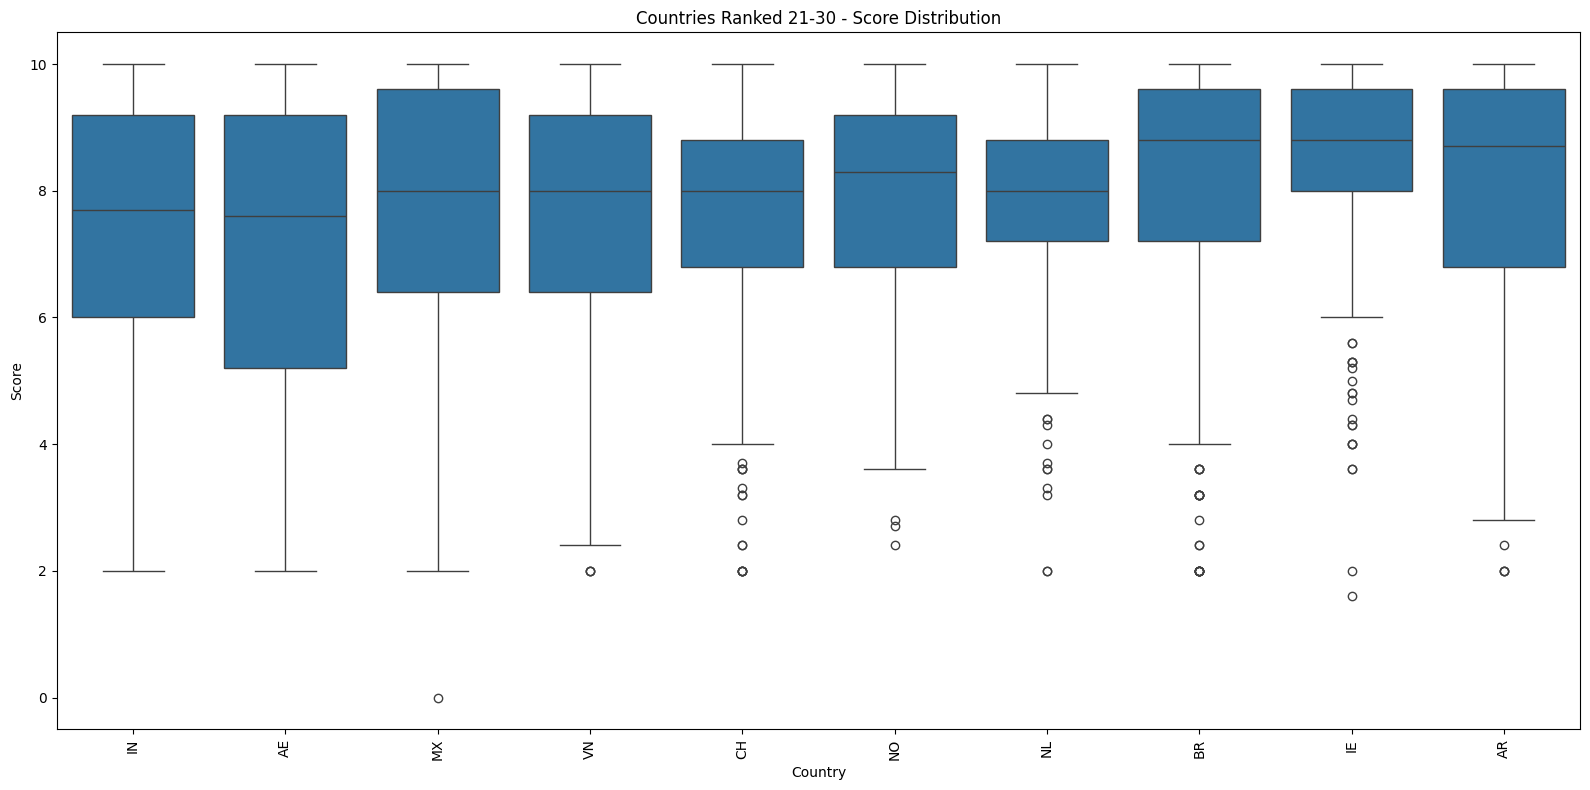

In [12]:
# 상위 21~30위 국가 추출
top_21_30_countries = df_clean['Country'].value_counts().nlargest(30).iloc[20:30].index
df_top_21_30_countries = df_clean[df_clean['Country'].isin(top_21_30_countries)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='Country', y='Score', data=df_top_21_30_countries)
plt.xticks(rotation=90)  # 국가명이 많으므로 x축 라벨을 회전
plt.title('Countries Ranked 21-30 - Score Distribution')
plt.xlabel('Country')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

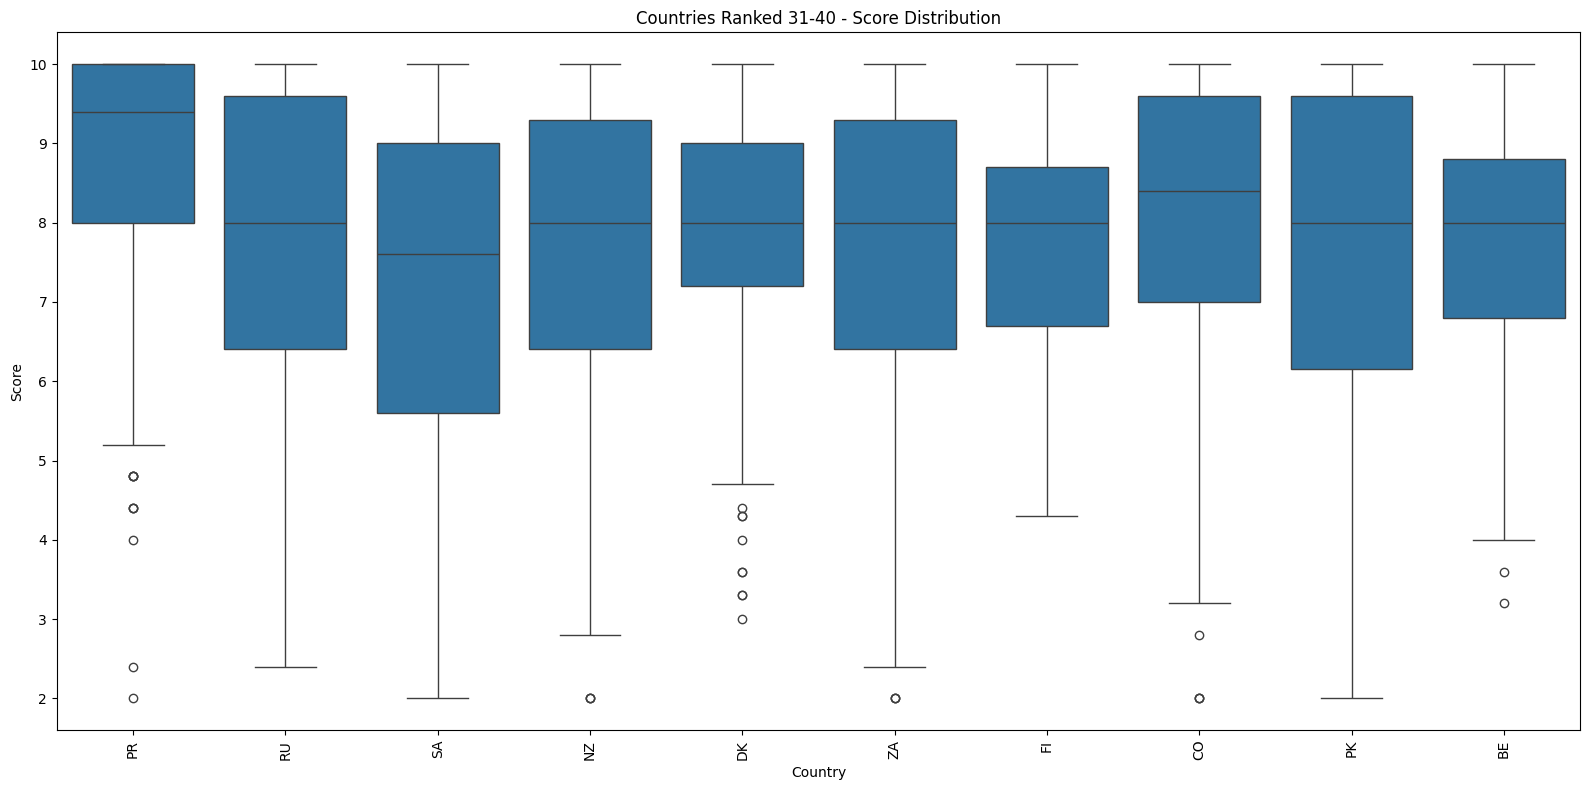

In [13]:
# 상위 31~40위 국가 추출
top_31_40_countries = df_clean['Country'].value_counts().nlargest(40).iloc[30:40].index
df_top_31_40_countries = df_clean[df_clean['Country'].isin(top_31_40_countries)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='Country', y='Score', data=df_top_31_40_countries)
plt.xticks(rotation=90)  # 국가명이 많으므로 x축 라벨을 회전
plt.title('Countries Ranked 31-40 - Score Distribution')
plt.xlabel('Country')
plt.ylabel('Score')
plt.tight_layout()
plt.show()